# Importações

In [23]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import sys
import argparse
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from scipy import ndimage
from PIL import Image

# Variáveis Globais

In [35]:
train_size        = 60 # Tamanho dos dados para treinamento
test_size         = 30 # Tamanho dos dados para teste
max_vid_per_class = 30 # Número máximo de vídeos por classe
batch_size        = 60 # Tamanho total dos dados de treinamento e validação
num_of_frames     = 12 # Número de frames que o vídeo será dividido
width             = 64 # Largura da imagem
height            = 48 # Altura da imagem
num_of_channels   = 1  # Número de canais da imagem (cinza, RGB, etc.)
num_of_classes    = 2  # Número de classes que serão utilizadas

# Classes

In [3]:
class_names = {
    "Acontecer": 0, "Aluno": 1, "Amarelo": 2, 'America': 3
}

# Transformação dos frames de vídeos para treinamento

In [45]:
angles = [-20, -10, -5, 5, 10, 20] # Define alguns ângulos para rotação
video_classes = './LIBRAS-Dataset/Treino/' # caminho da pasta com os arquivos
X_data_train = [] # armazena os frames
Y_data_train = [] # armazena as labels
list_of_classes = os.listdir(video_classes) # pega o nome de todos os arquivos dentro da pasta
print(list_of_classes)

class_counter = 0
for k in list_of_classes:
    if (class_counter >= num_of_classes):
        break
    class_counter = class_counter + 1
    video_folder = str(video_classes + k + '/')
    list_of_videos = os.listdir(video_folder)
    contador = 0
    print('\n===== ' + k + ' =====\n')
    # pega o nome de cada arquivo de vídeo e passa para transformar em frames
    for i in list_of_videos:
        if contador >= max_vid_per_class:
            print('\n\n===== FIM DA CLASSE =====\n')
            break
        contador = contador + 1
        # caminho do vídeo
        vid = str(video_folder + i)
        # lê o vídeo
        cap = cv2.VideoCapture(vid)
        frames = [] # armazenar os frames
        rotatedFrames = [] # armazenar os frames distorcidos
        count = 0 # contador para pegar cada frame
        angle = random.choice(angles) # escolhe aleatóriamente um ângulo
        for j in range(num_of_frames): # aqui pegamos n frames de acordo com num_of_frames
            # 1000 = 1 segundo, 500 = meio segundo...
            cap.set(cv2.CAP_PROP_POS_MSEC,(count*250)) # seta o momento do vídeo para pegar o frame
            ret, frame = cap.read() # pega de fato o frame, e se deu sucesso ou não
            if ret == True: # se deu sucesso...
                print('S=>', end="")
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converte o frame para cinza
                frame = cv2.resize(frame,(width,height),interpolation=cv2.INTER_AREA) # redimensiona o frame
                frames.append(frame) # adiciona o frame para o vetor de frames
                rotatedFrame = ndimage.rotate(frame, angle, reshape=False)
                rotatedFrames.append(rotatedFrame)
            else:
                print('*E*=>', end="")
            count = count + 1
        X_data_train.append(frames) # adiciona todos os frames de um vídeo
        Y_data_train.append(class_names[k]) # adiciona a label do conjunto de frames
        X_data_train.append(rotatedFrames) # adiciona todos os frames de um vídeo
        Y_data_train.append(class_names[k]) # adiciona a label do conjunto de frames
X_data_train = np.array(X_data_train) # transforma o vetor de frames em array numpy
Y_data_train = np.array(Y_data_train) # transforma o vetor de label dos frames em array numpy
print('\n\n===== FIM =====\n\n')

['Acontecer', 'Aluno', 'Amarelo', 'America', 'Aproveitar', 'Bala', 'Banco', 'Banheiro', 'Barulho', 'Cinco', 'Conhecer', 'Espelho', 'Esquina', 'Filho', 'Maca', 'Medo', 'Ruim', 'Sapo', 'Vacina', 'Vontade']

===== Acontecer =====

S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S

# Transformação dos frames de vídeos para teste

In [40]:
video_classes = './LIBRAS-Dataset/Teste/' # caminho da pasta com os arquivos
X_data_test = [] # armazena os frames
Y_data_test = [] # armazena as labels
list_of_classes = os.listdir(video_classes) # pega o nome de todos os arquivos dentro da pasta
print(list_of_classes)

class_counter = 0
for k in list_of_classes:
    if (class_counter >= num_of_classes):
        break
    class_counter = class_counter + 1
    video_folder = str(video_classes + k + '/')
    list_of_videos = os.listdir(video_folder)
    contador = 0
    print('\n===== ' + k + ' =====\n')
    # pega o nome de cada arquivo de vídeo e passa para transformar em frames
    for i in list_of_videos:
        if contador >= max_vid_per_class:
            print('\n\n===== FIM DA CLASSE =====\n')
            break
        contador = contador + 1
        # caminho do vídeo
        vid = str(video_folder + i)
        # lê o vídeo
        cap = cv2.VideoCapture(vid)
        frames = [] # armazenar os frames
        count = 0 # contador para pegar cada frame
        for j in range(num_of_frames): # aqui pegamos n frames de acordo com num_of_frames
            # 1000 = 1 segundo, 500 = meio segundo...
            cap.set(cv2.CAP_PROP_POS_MSEC,(count*250)) # seta o momento do vídeo para pegar o frame
            ret, frame = cap.read() # pega de fato o frame, e se deu sucesso ou não
            if ret == True: # se deu sucesso...
                print('S=>', end="")
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converte o frame para cinza
                frame = cv2.resize(frame,(width,height),interpolation=cv2.INTER_AREA) # redimensiona o frame
                frames.append(frame) # adiciona o frame para o vetor de frames
            else:
                print('*E*=>', end="")
            count = count + 1
        X_data_test.append(frames) # adiciona todos os frames de um vídeo
        Y_data_test.append(class_names[k]) # adiciona a label do conjunto de frames
X_data_test = np.array(X_data_test) # transforma o vetor de frames em array numpy
Y_data_test = np.array(Y_data_test) # transforma o vetor de label dos frames em array numpy
print('\n\n===== FIM =====\n\n')

['Acontecer', 'Aluno', 'Amarelo', 'America', 'Aproveitar', 'Bala', 'Banco', 'Banheiro', 'Barulho', 'Cinco', 'Conhecer', 'Espelho', 'Esquina', 'Filho', 'Maca', 'Medo', 'Ruim', 'Sapo', 'Vacina', 'Vontade']

===== Acontecer =====

S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>
===== Aluno =====

S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=>S=

# Formato dos dados

In [41]:
print(X_data_train.shape)
print(Y_data_train.shape)
print(Y_data_train)

print(X_data_test.shape)
print(Y_data_test.shape)
print(Y_data_test)

# volume = ndimage.rotate(X_data_train[0][0], -10, reshape=False)
# print(X_data_train[0][0][0])
# print(volume[0])



# # converte a imagem de numpy para Image
# image0 = Image.fromarray(volume)

# # plota as imagens
# plt.imshow(image0, 'gray')

(60, 12, 64, 48, 1)
(60,)
[1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
(60, 12, 48, 64)
(60,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Embaralhamento dos dados

In [36]:
X_data_train, Y_data_train = shuffle(X_data_train, Y_data_train)
print(Y_data_train)

X_data_test, Y_data_test = shuffle(X_data_test, Y_data_test)
print(Y_data_test)

[1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1]
[1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1]


# Exemplo de frames de um vídeo

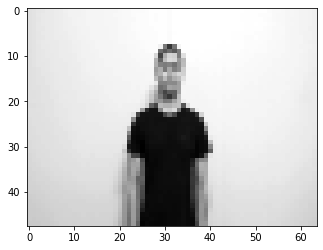

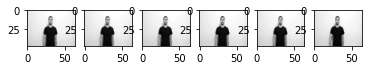

In [32]:
# converte a imagem de numpy para Image
image0 = Image.fromarray(X_data_train[0][0])
image1 = Image.fromarray(X_data_train[0][1])
image2 = Image.fromarray(X_data_train[0][2])
image3 = Image.fromarray(X_data_train[0][3])
image4 = Image.fromarray(X_data_train[0][4])
image5 = Image.fromarray(X_data_train[0][5])

# plota as imagens
plt.imshow(image0, 'gray')
f, axarr = plt.subplots(1, 6)
axarr[0].imshow(image0, 'gray')
axarr[1].imshow(image1, 'gray')
axarr[2].imshow(image2, 'gray')
axarr[3].imshow(image3, 'gray')
axarr[4].imshow(image4, 'gray')
axarr[5].imshow(image5, 'gray')

# Remodelar o conjunto de dados
Exemplo:
So, if you have 10000 samples in total, using sets of 10 frames per input, with 30 x 30 dimensions and 1 channel of color, you may reshape your X_data like:

X_data = X_data.reshape(10000, 10, 30, 30, 1)

In [37]:
# transforma os dados dos frames armazenados no formato ideal para ser usado no treinamento
X_data_train = X_data_train.reshape(train_size, num_of_frames, width, height, num_of_channels)
print(np.shape(X_data_train))

X_data_test = X_data_test.reshape(test_size, num_of_frames, width, height, num_of_channels)
print(np.shape(X_data_test))

(60, 12, 64, 48, 1)
(30, 12, 64, 48, 1)


# Definição da Rede Neural Convolucional 3D 

In [38]:
 def get_model():
    
    # Camadas do modelo
    
    model = keras.Sequential()

    model.add(keras.layers.Conv3D(50, (5,7,7), activation='relu', input_shape=(num_of_frames, width, height, num_of_channels)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling3D((1, 2, 2), padding='same'))

    model.add(keras.layers.Conv3D(50, (5,7,7), activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling3D((1, 2, 2), padding='same'))
    
    model.add(keras.layers.Conv3D(10, (3,5,5), activation='relu'))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Flatten())
#     model.add(keras.layers.Dense(200, activation='sigmoid'))
#     model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(num_of_classes, activation='sigmoid', use_bias=True))
    
    # Compilação do modelo
    
    initial_learning_rate = 0.0001
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
    )
    
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        metrics=["acc"],
    )
    
#     model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

# Constrói o modelo.
model = get_model()

# Dados do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 8, 58, 42, 50)     12300     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 58, 42, 50)     200       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 8, 29, 21, 50)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 4, 23, 15, 50)     612550    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 23, 15, 50)     200       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 12, 8, 50)      0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 2, 8, 4, 10)       3

# Treinamento do Modelo

In [ ]:
# epochs = 100
# model.fit(X_data_train, Y_data_train, epochs=epochs, batch_size=train_size, shuffle=True)

# Treinamento do modelo até determinada acurácia

In [39]:
epochs = 100
accuracy = 0
while accuracy < 0.89:
    model.fit(X_data_train, Y_data_train, epochs=epochs, batch_size=train_size, shuffle=True)
    result = model.evaluate(X_data_test, Y_data_test)
    if (result[1] > accuracy):
        model.save('./model/')
        accuracy = result[1]
    print(result[1])

Epoch 1/100
1/1 [==============================] - 49s 49s/step - loss: 0.9774 - acc: 0.4833
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.3275 - acc: 0.8167
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.1246 - acc: 0.9833
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.0871 - acc: 1.0000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.0535 - acc: 1.0000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.0410 - acc: 1.0000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 0.0243 - acc: 1.0000
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 0.0172 - acc: 1.0000
Epoch 9/100
1/1 [==============================] - 2s 2s/step - loss: 0.0129 - acc: 1.0000
Epoch 10/100
1/1 [==============================] - 2s 2s/step - loss: 0.0099 - acc: 1.0000
Epoch 11/100
1/1 [==============================] - 2s 2s/step - loss: 0.0079 - acc: 1.

1/1 [==============================] - 2s 2s/step - loss: 1.3382e-04 - acc: 1.0000
Epoch 88/100
1/1 [==============================] - 2s 2s/step - loss: 1.3218e-04 - acc: 1.0000
Epoch 89/100
1/1 [==============================] - 2s 2s/step - loss: 1.3060e-04 - acc: 1.0000
Epoch 90/100
1/1 [==============================] - 2s 2s/step - loss: 1.2905e-04 - acc: 1.0000
Epoch 91/100
1/1 [==============================] - 2s 2s/step - loss: 1.2756e-04 - acc: 1.0000
Epoch 92/100
1/1 [==============================] - 2s 2s/step - loss: 1.2611e-04 - acc: 1.0000
Epoch 93/100
1/1 [==============================] - 2s 2s/step - loss: 1.2470e-04 - acc: 1.0000
Epoch 94/100
1/1 [==============================] - 2s 2s/step - loss: 1.2333e-04 - acc: 1.0000
Epoch 95/100
1/1 [==============================] - 2s 2s/step - loss: 1.2198e-04 - acc: 1.0000
Epoch 96/100
1/1 [==============================] - 2s 2s/step - loss: 1.2067e-04 - acc: 1.0000
Epoch 97/100
1/1 [==============================] - 2

1/1 [==============================] - 2s 2s/step - loss: 6.4708e-05 - acc: 1.0000
Epoch 72/100
1/1 [==============================] - 2s 2s/step - loss: 6.4283e-05 - acc: 1.0000
Epoch 73/100
1/1 [==============================] - 2s 2s/step - loss: 6.3848e-05 - acc: 1.0000
Epoch 74/100
1/1 [==============================] - 2s 2s/step - loss: 6.3431e-05 - acc: 1.0000
Epoch 75/100
1/1 [==============================] - 2s 2s/step - loss: 6.3017e-05 - acc: 1.0000
Epoch 76/100
1/1 [==============================] - 2s 2s/step - loss: 6.2596e-05 - acc: 1.0000
Epoch 77/100
1/1 [==============================] - 2s 2s/step - loss: 6.2199e-05 - acc: 1.0000
Epoch 78/100
1/1 [==============================] - 2s 2s/step - loss: 6.1792e-05 - acc: 1.0000
Epoch 79/100
1/1 [==============================] - 2s 2s/step - loss: 6.1400e-05 - acc: 1.0000
Epoch 80/100
1/1 [==============================] - 2s 2s/step - loss: 6.1005e-05 - acc: 1.0000
Epoch 81/100
1/1 [==============================] - 2

Epoch 55/100
1/1 [==============================] - 2s 2s/step - loss: 4.0353e-05 - acc: 1.0000
Epoch 56/100
1/1 [==============================] - 2s 2s/step - loss: 4.0170e-05 - acc: 1.0000
Epoch 57/100
1/1 [==============================] - 2s 2s/step - loss: 3.9970e-05 - acc: 1.0000
Epoch 58/100
1/1 [==============================] - 2s 2s/step - loss: 3.9779e-05 - acc: 1.0000
Epoch 59/100
1/1 [==============================] - 2s 2s/step - loss: 3.9600e-05 - acc: 1.0000
Epoch 60/100
1/1 [==============================] - 2s 2s/step - loss: 3.9410e-05 - acc: 1.0000
Epoch 61/100
1/1 [==============================] - 2s 2s/step - loss: 3.9223e-05 - acc: 1.0000
Epoch 62/100
1/1 [==============================] - 2s 2s/step - loss: 3.9040e-05 - acc: 1.0000
Epoch 63/100
1/1 [==============================] - 2s 2s/step - loss: 3.8861e-05 - acc: 1.0000
Epoch 64/100
1/1 [==============================] - 2s 2s/step - loss: 3.8678e-05 - acc: 1.0000
Epoch 65/100
1/1 [======================

KeyboardInterrupt: 

# Treinamento do modelo até determinada acurácia, com dados de entrada aleatórios

In [ ]:
epochs = 100
accuracy = 0
while accuracy < 0.7:
    # Embaralha os dados
    X_data_train, Y_data_train = shuffle(X_data_train, Y_data_train)
    X_data_test, Y_data_test   = shuffle(X_data_test, Y_data_test)

    # transforma os dados dos frames armazenados no formato ideal para ser usado no treinamento
    X_data_train = X_data_train.reshape(train_size, num_of_frames, width, height, num_of_channels)
    X_data_test  = X_data_test.reshape(test_size, num_of_frames, width, height, num_of_channels)
    
    model.fit(X_data_train, Y_data_train, epochs=epochs, batch_size=train_size, shuffle=True)
    result = model.evaluate(X_data_test, Y_data_test)
    if (result[1] > accuracy):
        model.save('./model/')
        accuracy = result[1]
    print(result[1])

Epoch 1/100


# Validação do modelo

In [13]:
model.evaluate(X_data_test, Y_data_test)

1/1 [==============================] - 0s 198ms/step - loss: 1.3640 - acc: 0.5500


[1.363975167274475, 0.550000011920929]

# Predição do modelo

In [15]:
prediction = model.predict(np.expand_dims(X_data_test[3], axis=0))[0]
print(Y_data_test)
for predict, name in zip(prediction, class_names):
    print(
        "%.2f ==> %s"
        % ((100 * predict), name)
    )

[1 1 0 2 1 0 1 3 0 2 3 1 3 3 3 0 2 0 2 2]
58.63 ==> Acontecer
79.22 ==> Aluno
46.48 ==> Amarelo
26.10 ==> America


# Salvar o modelo

In [ ]:
model.save('./model/')

# Carregar o modelo

In [ ]:
newModel = keras.models.load_model('./model/')